# Bank marketing

using [this dataset](https://www.kaggle.com/henriqueyamahata/bank-marketing/home) to predict if the client will subscribe (yes/no) a term deposit (variable y).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('../dataset/bank-additional-full.csv',sep=';')
dataset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [28]:
dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [14]:
dataset['default'].value_counts()#.plot(kind='pie')

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['job'] = le.fit_transform(dataset['job'])
dataset['marital'] = le.fit_transform(dataset['marital'])
dataset['education'] = le.fit_transform(dataset['education'])
dataset['default'] = le.fit_transform(dataset['default'])
dataset['housing'] = le.fit_transform(dataset['housing'])
dataset['loan'] = le.fit_transform(dataset['loan'])
dataset['contact'] = le.fit_transform(dataset['contact'])
dataset['month'] = le.fit_transform(dataset['month'])
dataset['day_of_week'] = le.fit_transform(dataset['day_of_week'])
dataset['poutcome'] = le.fit_transform(dataset['poutcome'])
dataset['y'] = le.fit_transform(dataset['y'])

In [11]:
X = dataset.iloc[: , :-1].values
y = dataset.iloc[: , -1].values
y

array([0, 0, 0, ..., 0, 1, 0])

In [12]:
from imblearn.over_sampling import SMOTE   #'Synthetic Minority Oversampling TEchnique'
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
y

array([0, 0, 0, ..., 1, 1, 1])

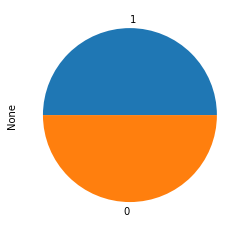

In [14]:
pd.Series(y).value_counts().plot(kind='pie')

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [16]:
# from sklearn.preprocessing import OneHotEncoder
# one = OneHotEncoder()
# X = one.fit_transform(X)

In [24]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler(with_mean=False)
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced',max_iter=100)
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

/home/mohamedalgebali/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8607387140902872

In [18]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

/home/mohamedalgebali/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8596443228454173

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [32]:
def best_clf(clf ,params ,X_train, y_train, search_type='Grid'):
    randomized_search =RandomizedSearchCV(clf,params,cv=3)
    grid_search = GridSearchCV(estimator = clf,param_grid = params,cv = 3)
    
    if search_type == 'Grid':
        Grid_search = grid_search.fit(X_train,y_train)
        return Grid_search
    elif search_type == 'Random':
        Random_search = randomized_search.fit(X_train,y_train)
        return Random_search

In [34]:
clfs = [KNeighborsClassifier()]#,SGDClassifier(class_weight='balanced')]

# params_of_SGD = [[{"penalty": ["l1", "l2", "elasticnet"]
#             ,"loss":["hinge", "log", "modified_huber", "squared_hinge", "perceptron"]}],
params = [{ 'n_neighbors':[5,7,9,11],
            'weights':['uniform','distance']
            }]
            
best_Score = {'clf':None ,'param' : None, 'score':0}
for clf,param in zip(clfs,params):
    search = best_clf(clf,param,X_train, y_train)
    print(search.best_score_)
    if search.best_score_ >= best_Score['score']:
        best_Score['score'] = search.best_score_
        best_Score['clf'] = clf
        best_Score['param'] = search.best_params_
        
print(best_Score)

0.9251658800191532
{'clf': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), 'param': {'n_neighbors': 5, 'weights': 'distance'}, 'score': 0.9251658800191532}


In [20]:
from sklearn.model_selection import cross_val_score
clf = SGDClassifier(penalty='l1')
accur = cross_val_score(clf,X=X_train,y=y_train,cv=3)
accur.mean()

0.7887701335687698

In [21]:
clf.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l1',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, clf.predict(X_test))
pd.DataFrame(cm)

,0,1
0,3160,547
1,615,2988


In [23]:
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      3707
           1       0.85      0.83      0.84      3603

    accuracy                           0.84      7310
   macro avg       0.84      0.84      0.84      7310
weighted avg       0.84      0.84      0.84      7310



In [24]:
print(classification_report(y_test,lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      3707
           1       0.85      0.87      0.86      3603

    accuracy                           0.86      7310
   macro avg       0.86      0.86      0.86      7310
weighted avg       0.86      0.86      0.86      7310



In [25]:
knn = KNeighborsClassifier(n_neighbors= 7, p= 1, weights= 'distance')
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, knn.predict(X_test))
pd.DataFrame(cm)

              precision    recall  f1-score   support

           0       1.00      0.88      0.93      3707
           1       0.89      1.00      0.94      3603

    accuracy                           0.94      7310
   macro avg       0.94      0.94      0.94      7310
weighted avg       0.94      0.94      0.94      7310



,0,1
0,3244,463
1,4,3599


In [26]:
# from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
# ada= AdaBoostClassifier(n_estimators=100)
# ada.fit(X_train,y_train)
# print(classification_report(y_test,ada.predict(X_test)),'\n------------------------')

# gbc= GradientBoostingClassifier(n_estimators=100)
# gbc.fit(X_train,y_train)
# print(classification_report(y_test,gbc.predict(X_test)))

from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
print(classification_report(y_test,xgb.predict(X_test)))
cm = confusion_matrix(y_test, xgb.predict(X_test))
pd.DataFrame(cm)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      3707
           1       0.96      0.94      0.95      3603

    accuracy                           0.95      7310
   macro avg       0.95      0.95      0.95      7310
weighted avg       0.95      0.95      0.95      7310



,0,1
0,3568,139
1,199,3404


In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
print(classification_report(y_test,rf.predict(X_test)))
cm = confusion_matrix(y_test, rf.predict(X_test))
pd.DataFrame(cm)

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      3707
           1       0.95      0.96      0.96      3603

    accuracy                           0.96      7310
   macro avg       0.96      0.96      0.96      7310
weighted avg       0.96      0.96      0.96      7310



,0,1
0,3535,172
1,141,3462


In [63]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
print(classification_report(y_test,gnb.predict(X_test)))
cm = confusion_matrix(y_test, gnb.predict(X_test))
pd.DataFrame(cm)

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      7396
           1       0.77      0.77      0.77      7224

    accuracy                           0.77     14620
   macro avg       0.77      0.77      0.77     14620
weighted avg       0.77      0.77      0.77     14620



,0,1
0,5742,1654
1,1653,5571


In [25]:
from sklearn.svm import SVC
svc = SVC(kernel='poly')
svc.fit(X_train,y_train)

NameError: name 'classification_report' is not defined

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(y_test,svc.predict(X_test)))
cm = confusion_matrix(y_test, svc.predict(X_test))
pd.DataFrame(cm)

              precision    recall  f1-score   support

           0       0.88      0.81      0.85      7386
           1       0.82      0.89      0.85      7234

    accuracy                           0.85     14620
   macro avg       0.85      0.85      0.85     14620
weighted avg       0.85      0.85      0.85     14620



,0,1
0,6006,1380
1,806,6428


#################################################################################################################
#################################################################################################################

## It's obvoius that RandomForestClassifer is the best one

In [55]:
def test(test_input):
    test_input = np.array(test_input).reshape(1,-1)
    return rf.predict(test_input)